# Proposed Feature Maps

In this tutorial, we explain the implementation of the propsed feature maps along with an illustrative example. We start with importing `numpy`, which is the only requirement for the implementation.

In [1]:
import numpy as np
from numpy import linalg

The following code block is the implementation of the feature maps $\phi_{p,1}(\mathbf{x}~|~\mathbf{a})$ and $ \phi_{p,d}(\mathbf{x}~|~\mathbf{a})$, which use single anchor points. The feature map $\phi_{p,1}(\mathbf{x}_i~|~\mathbf{a}_i)$ uses multiple anchor points.

In [2]:

def phi_p_1(X, p=1):
    return np.hstack((X, (linalg.norm(X, axis=1, ord=p) ** p).reshape((len(X), 1))))

def phi_p_d(X, p=1):
    return np.hstack((X, np.abs(X) ** p))

def min_phi_p_1(X, anchors=[], p=1):
    temp=[]
    for a in anchors:
        temp.append(linalg.norm(X-a,axis=1,ord=p)**p)
    return np.hstack((X,np.min(temp,axis=0).reshape((len(X), 1))))

def linear(X, p=1):
    return X

The scripts below produces the bottom row of Figure 2 in our paper.

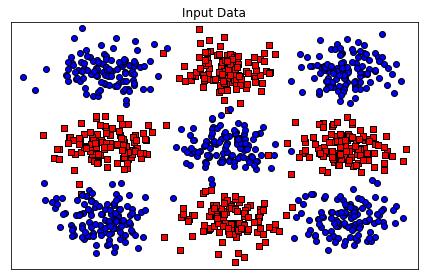

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.svm import LinearSVC
h = .2  # step size in the mesh
random_state = 170
n_Samples = 1000
centers = [(-5, -5), (0, -5),(5,-5),(-5,0),(0,0),(5,0),(-5,5),(0,5),(5,5)]
X,y=make_blobs(n_samples=n_Samples, centers=centers, shuffle=False,random_state=random_state)
for i in range(len(y)):
        if y[i]%2==0:
            y[i]=0
        else:
            y[i]=1
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_unique = np.unique(y)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot input data (Figure 2)
plt.scatter(X[y == y_unique[1]][:, 0], X[y == y_unique[1]][:, 1], c='red', cmap=cm_bright, edgecolors='k',
           marker='s')
plt.scatter(X[y == y_unique[0]][:, 0], X[y == y_unique[0]][:, 1], c='blue', cmap=cm_bright, edgecolors='k',
           marker='o')
plt.title('Input Data', size=12,loc='center')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

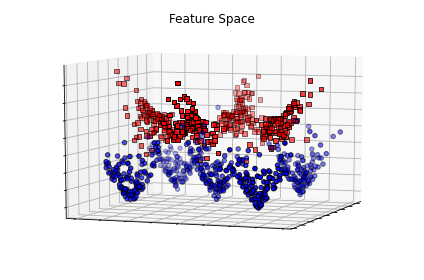

In [4]:
# Plot feature space for p=1 (Figure 2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=20,elev=8)

centers=np.array(centers)
cl=[0,2,4,6,8]
XD=min_phi_p_1(X, anchors= centers[cl], p=1)
ax.scatter(XD[y == y_unique[1]][:, 0], XD[y == y_unique[1]][:, 1],  XD[y == y_unique[1]][:, 2],  c='red', cmap=cm_bright, edgecolors='k',
           marker='s')
ax.scatter(XD[y == y_unique[0]][:, 0], XD[y == y_unique[0]][:, 1],  XD[y == y_unique[0]][:, 2],c='blue', cmap=cm_bright, edgecolors='k',
           marker='o')
ax.set_title('Feature Space', size=12,loc='center')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
z_min,z_max=np.min(XD[:,2])-0.5,np.max(XD[:,2])+0.5
ax.set_zlim(z_min, z_max)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.tight_layout()
plt.show()

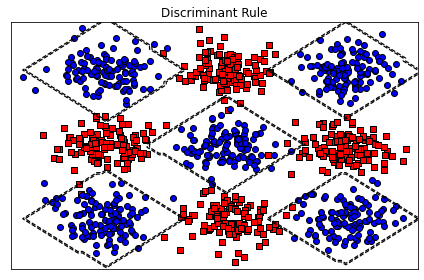

In [5]:
# Plot dicriminant rule for p=1 (Figure 2)
plt.title('Discriminant Rule', size=12,loc='center')
plt.scatter(X[y == y_unique[1]][:, 0], X[y == y_unique[1]][:, 1], c='red', cmap=cm_bright, edgecolors='k',
           marker='s')
plt.scatter(X[y == y_unique[0]][:, 0], X[y == y_unique[0]][:, 1], c='blue', cmap=cm_bright, edgecolors='k',
           marker='o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

clf = LinearSVC(C=10, max_iter=10000, tol=1e-4, dual=False).fit(min_phi_p_1(X, anchors= centers[cl], p=1), y)
Z = clf.predict(min_phi_p_1(np.c_[xx.ravel(), yy.ravel()],anchors=centers[cl],p=1))

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, 1, colors='k', linewidths=1.2, alpha=1, linestyles='--')
plt.tight_layout()
plt.show()